# Punto 1
## a) Reemplazo $S=jw$ luego hallo la fase y la derivo respecto de W

In [2]:
from scipy import signal
from sympy import *
import matplotlib.pyplot as plt
import math as m
from splane import pzmap, grpDelay, bodePlot
import numpy as np

S, W=symbols('S W')

T_S=3/(S**2 +3*S +3)
print("T(S)=")
pprint(T_S)
T_W=T_S.subs(S,I*W)
print("T(jw)=")
pprint(T_W)
print("multiplico por el conjugado arriba y abajo")
T_W_num=(3-W**2 - I*3*W)* T_W*(3-W**2 + I*3*W)
print("T(jw) numerador queda=")
pprint(T_W_num)
T_W_den=T_W/(3*(3-W**2 - I*3*W))
print("T(jw) denominador queda=")
pprint(simplify(T_W_den))
print("Entonces nos quedaria algo como:")
print("T(jw)=")
T_W_Real=(9-3*W**2)/(W**4+3*W**2+9)
T_W_Img=(-I*9*W)/(W**4+3*W**2+9)
pprint(T_W_Real + T_W_Img)
print("Por lo tanto la fase sera atan(Img/Real)")
Fase_W=simplify(atan(-I*T_W_Img/T_W_Real))
pprint(Fase_W)
print("Por ultimo el retardo sera:")
Retardo=diff(Fase_W,W)
pprint(simplify(Retardo))

T(S)=
     3      
────────────
 2          
S  + 3⋅S + 3
T(jw)=
       3        
────────────────
   2            
- W  + 3⋅ⅈ⋅W + 3
multiplico por el conjugado arriba y abajo
T(jw) numerador queda=
     2            
- 3⋅W  - 9⋅ⅈ⋅W + 9
T(jw) denominador queda=
      1      
─────────────
 4      2    
W  + 3⋅W  + 9
Entonces nos quedaria algo como:
T(jw)=
                            2  
      9⋅ⅈ⋅W          9 - 3⋅W   
- ───────────── + ─────────────
   4      2        4      2    
  W  + 3⋅W  + 9   W  + 3⋅W  + 9
Por lo tanto la fase sera atan(Img/Real)
    ⎛ 3⋅W  ⎞
atan⎜──────⎟
    ⎜ 2    ⎟
    ⎝W  - 3⎠
Por ultimo el retardo sera:
  ⎛   2    ⎞ 
 -⎝3⋅W  + 9⎠ 
─────────────
 4      2    
W  + 3⋅W  + 9


## b) Armo ambos filtros y le pido a las funciones que hagan los subindices.

0 zeros: []
3 poles: [-1.83890732+1.75438096j -1.83890732-1.75438096j -2.32218535+0.j        ]
gain: 15.0


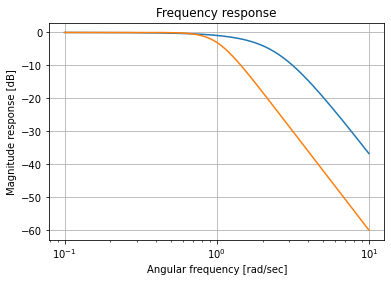

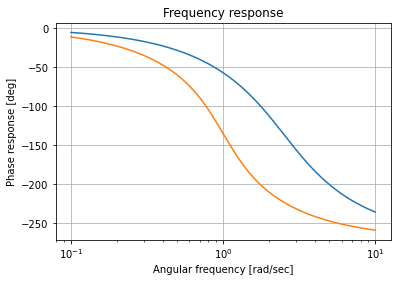

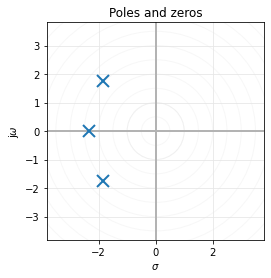

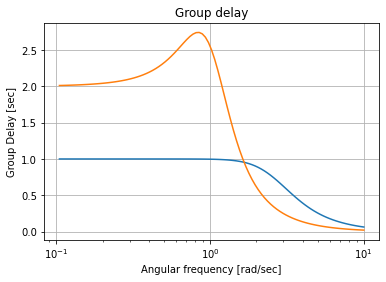

In [26]:
num_Bessel_3=[15]
den_Bessel_3=[1,6,15,15]
Sys_Bessel_3=signal.TransferFunction(num_Bessel_3,den_Bessel_3)
bodePlot(Sys_Bessel_3)
pzmap(Sys_Bessel_3)
grpDelay(Sys_Bessel_3)

num_Butter_3=[1]
den_Butter_3=[1,2,2,1]
Sys_Butter_3=signal.TransferFunction(num_Butter_3,den_Butter_3)
bodePlot(Sys_Butter_3)
grpDelay(Sys_Butter_3)

0 zeros: []
3 poles: [-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]
gain: 1.0


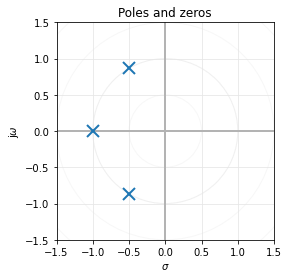

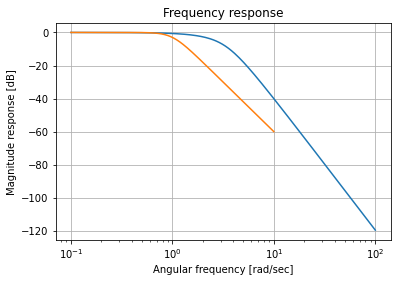

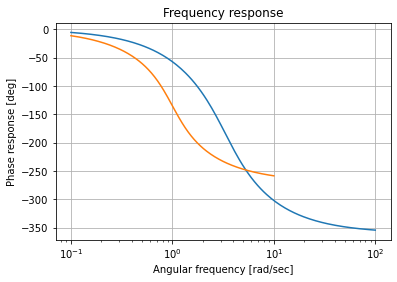

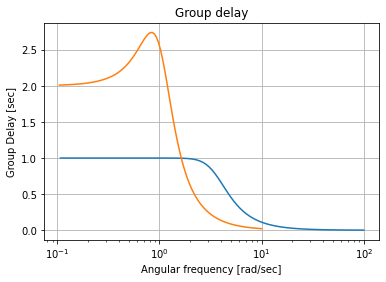

In [27]:
pzmap(Sys_Butter_3)
num_Bessel_4=[105]
den_Bessel_4=[1,10,45,105,105]
Sys_Bessel_4=signal.TransferFunction(num_Bessel_4,den_Bessel_4)
bodePlot(Sys_Bessel_4)
grpDelay(Sys_Bessel_4)

num_Butter_4=[1]
den_Butter_4=[1,2.6132,3.4143,2.6132,1]
Sys_Butter_4=signal.TransferFunction(num_Butter_3,den_Butter_3)
bodePlot(Sys_Butter_4)
grpDelay(Sys_Butter_4)


# Explicaciones:
## B1) Los polos del bessel tienen mas forma ovalada que el butter
## B2) El modulo de Butter corta mejor(mas pendiente) y mas rapido(mas cerca del 1 rad/s) que el bessel
## B3)Bessel nos busca dar linealidad de retardo adentro de la banda de paso, no asi butter.

# c) Transferencia hallada:
<img src="./Circuito 1-c.PNG" align="center" width="80%" />

Sabemos que el polinomio a sintetizar debe ser:
     3      
────────────
 2          
S  + 3⋅S + 3
Resuelvo igualando a la transferencia hallada
Solucion #1
	C1: 2/3
	C2: 1/2


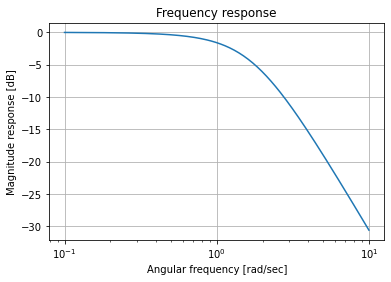

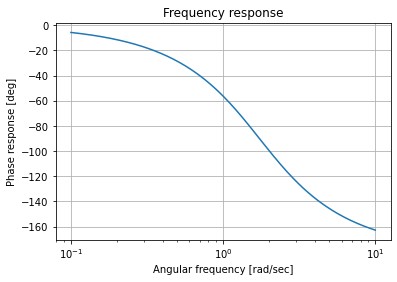

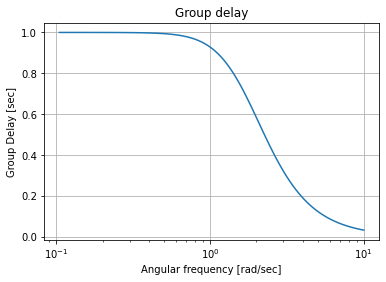

In [12]:
print("Sabemos que el polinomio a sintetizar debe ser:")
Pol_pedido=3/(S**2 + 3*S +3)
pprint(Pol_pedido)
num_Bessel_2=[3]
den_Bessel_2=[1,3,3]
Sys_Bessel_2=signal.TransferFunction(num_Bessel_2,den_Bessel_2)
bodePlot(Sys_Bessel_2)
grpDelay(Sys_Bessel_2)

print("Resuelvo igualando a la transferencia hallada")

####Determino variables#######

C1, C2, R1, R2 = symbols('C1 C2 R1 R2')

####Determino las ecuaciones simultaneas a resolver ####
####Con condiciones de diseño#########
####Para este caso particular propongo como condicions R1=R2=1####
ecuaciones = [
    (1/(C1*C2*R1*R2)-3).subs([(R1, 1), (R2, 1)]),
    ((R1+R2)/(C1*R1*R2)-3).subs([(R1, 1), (R2, 1)])  
    ]

####Resuelvo para R1 R2#######

conjunto_sol=solve(ecuaciones,C1, C2, set=True)

###imprimo###
Nombres=conjunto_sol[0]
Soluciones=list(conjunto_sol[1])
for k in range(len(Soluciones)):
    
    print('Solucion #%d' % (k+1))
    for k2, nombre in enumerate(Nombres):
        print('\t%s: %s' % (nombre, Soluciones[k][k2]) )


<img src="./Circuito 1-c normal.PNG" align="center" width="80%" />
Ahora desnormalizo para $f=1Khz$ e $impedancia=1\Omega$ ya que no creo afecte el comportamiento

In [19]:
##########Constantes de Desnormalizacion#############
N_z=1
N_w=1*10**3 *2*m.pi
#N_w=1
####Vector de resistencias Normalizadas#############
#####Se debe inicializar con los valores de tus resistencias########
R_n=[1]

####Vector de resistencias Desnormalizadas##########
R=[]
for i in range(len(R_n)):
    
    R.append(R_n[i]*N_z)
    print('R[',i+1,'] valia',R_n[i],'=>',R[i])

####Vector de capacitores Normalizados#############
#####Se debe inicializar con los valores de tus capacitores########
C_n=[2/3,0.5]

####Vector de Capacitores Desnormalizados##########

C=[]
for i in range(len(C_n)):
    C.append(C_n[i]/N_z / N_w)
    print('C[',i+1,'] valia',C_n[i],'=>',C[i])

####Vector de inductores Normalizados#############
#####Se debe inicializar con los valores de tus inductores########
L_n=[]

####Vector de inductores Desnormalizados##########

L=[]
for i in range(len(L_n)):
    L.append(L_n[i]*N_z/N_w)
    print('L[',i+1,'] valia',L_n[i],'=>',L[i])

R[ 1 ] valia 1 => 1
C[ 1 ] valia 0.6666666666666666 => 0.0001061032953945969
C[ 2 ] valia 0.5 => 7.957747154594768e-05


<img src="./Circuito 1-c Desnormal.PNG" align="center" width="80%" />
<img src="./Retardo.PNG" align="center" width="80%" />

# Punto 2
## a)
Dado$Y_{o1}=Y_{o2}=Y_o$
$S_{11}$ es el coeficiente de reflexion en el puerto 1
$$S_{11}=\frac{Z_1-R_{o1}}{Z_1+R_{o1}}=\frac{Y_{o1}-Y_1}{Y_{o1}+Y_1}=\frac{Y_o-(Y_x+Y_o)}{Y_o+(Y_x+Y_o)}=\frac{-Y_x}{Y_x+2Y_o}$$
$S_{12}$ es el coeficiente de transmision inversa.<br>
Planteo un divisor de tension.<br>
$$V_2=V_{g1}\frac{Y_o}{Y_x+Y_o+Y_o}$$
$$S_{21}=\frac{V_2}{V_{g1}/2}=\frac{2Y_o}{Y_x+2Y_o}$$
$S_{21}$ es el coeficiente de transmision directa
$$S_{21}=\frac{2Y_o}{Y_x+2Y_o}$$
Esto tiene sentido porque la red es reciproca.<br>
$S_{22}$ es el coeficiente de reflexion en el puerto 2
$$S_{22}=\frac{Z_2-R_{o2}}{Z_1+R_{o2}}=\frac{Y_{o2}-Y_2}{Y_{o2}+Y_2}=\frac{Y_o-(Y_x+Y_o)}{Y_o+(Y_x+Y_o)}=\frac{-Y_x}{Y_x+2Y_o}$$
Este ultimo tiene sentido porque la red es simetrica.
## b)
Despejamos $Y_x$ en funcion de $S_{11}$ e $Y_o$
$$S_{11}=\frac{-Y_x}{Y_x+2Y_o}\rightarrow Y_x=\frac{-2Y_oS_{11}}{1+S_{11}}$$
## c)
A partir de la formula anterior podemos hallar $Y_x$ y sintetizarla:

In [23]:
S11=(-2*(S**2 +1))/(S**3 +2*S**2 +5*S+2)
Yx=simplify((-2*S11)/(1+S11))
pprint(Yx)
pprint(apart(Yx))
print("A simple vista vemos el Ko=4/5 y un ki=16/5")

  ⎛ 2    ⎞
4⋅⎝S  + 1⎠
──────────
  ⎛ 2    ⎞
S⋅⎝S  + 5⎠
   16⋅S       4 
────────── + ───
  ⎛ 2    ⎞   5⋅S
5⋅⎝S  + 5⎠      
A simple vista vemos el Ko=4/5 y un ki=16/5


<img src="./circuito 2-c.PNG" align="center" width="80%" />

# 3
Lo planteo como transimpedancia por la condicion de carga en vacio ya que la transadmitancia nos quedaria $Y_{21}=\frac{I_2}{V_g}=\frac{0}{V_g}$.<br>
Por inspeccion vemos unos -3dB en $\omega=1$ lo que nos hace pensar en butter, aparte del comentario de maxima planicidad por lo tanto los polos, los encontraremos sobre la circunferencia de radio unitario.
Despues tenemos un cero de transmision en $\omega=0.2$ lo que implica al menos 1 cero en esa frecuencia. Pero podemos ver que antes del cero de tx venia con 20 dB por decada por lo tanto hay un cero en cero y debe haber uno doble en el cero de tx, ya que mas adelante pasa a tener 60dB por decada antes de quedar plano el bode.

la transferencia se deberia ver como:
     ⎛ 2       ⎞   
   S⋅⎝S  + 0.04⎠   
───────────────────
 3      2          
S  + 2⋅S  + 2⋅S + 1
3 zeros: [-0.+0.2j  0.-0.2j  0.+0.j ]
3 poles: [-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j]
gain: 1.0


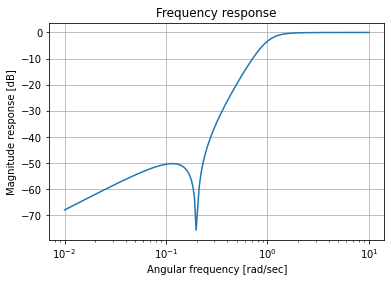

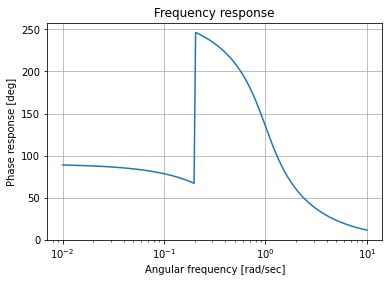

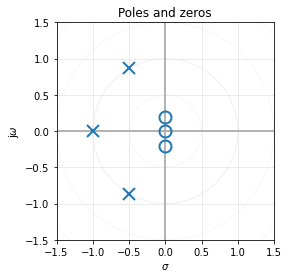

In [27]:
Pol_modelo=(S*(S**2+0.2**2))/(S**3+2*S**2+2*S+1)
print("la transferencia se deberia ver como:")
pprint(Pol_modelo)
num_3=[1,0,0.04,0]
den_3=[1,2,2,1]
Sys_3=signal.TransferFunction(num_3,den_3)
bodePlot(Sys_3)
pzmap(Sys_3)